# Project Template and Guidance

This Notebook is intended to provide some guidance for getting started with creating your first complete project workflow.

## Using Google Drive

Start by saving this Notebook to your Google Drive account. Then go to your Google Drive, click on the Colab Notebooks folder to find
You'll have to log into Google Drive this way if you want to load your dataset or save save your work as a new dataset.

In [ ]:
# Mount your Google Drive. It will prompt you to log into your Google account.
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Change the working directory to your project folder.
import os
drive_path = '/content/drive/MyDrive/Colab Notebooks/'
project_folder = 'Econ_0150_Project/'
os.chdir(drive_path + project_folder)

## Step 0 | Imports and Setup

In [ ]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf

In [ ]:
# Open a dataset from your project folder in Google Drive
data = pd.read_csv('usa_00049_sample.csv')

## Step 1 | Data Preparation

Turn your data into something you can explore through data operations.

In [ ]:
data = pd.read_csv('usa_00049_sample.csv')
data = data[data['YEAR'] == 2023][['INCTOT', 'EDUC']]
display(data.head())

,INCTOT,EDUC
0,9999999,1
1,15700,10
2,145000,11
3,90000,10
4,67000,8


In [ ]:
# Calculate Q1 (25th percentile) and Q3 (75th percentile) for 'INCTOT'
Q1 = data['INCTOT'].quantile(0.25)
Q3 = data['INCTOT'].quantile(0.75)

# Calculate the Interquartile Range (IQR)
IQR = Q3 - Q1

# Define the outlier bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers from 'INCTOT'
data = data[(data['INCTOT'] >= lower_bound) & (data['INCTOT'] <= upper_bound)]

display(data.head())

,INCTOT,EDUC
1,15700,10
2,145000,11
3,90000,10
4,67000,8
5,30000,11


In [ ]:
# Save your dataset after you've worked on it
data.to_csv('cleaned_data.csv')

## Step 2 | Exploratory Data Analysis

Summarize the main variables and relationships of interest.

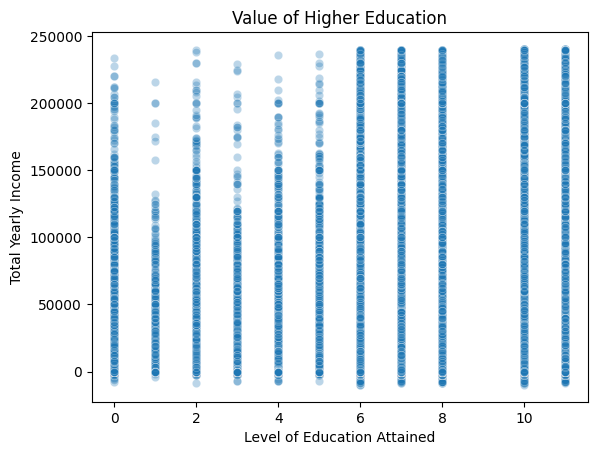

In [ ]:
# Exploratory Data Analysis here
sns.scatterplot(data=data, x='EDUC', y='INCTOT', alpha=0.3)
plt.title('Value of Higher Education')
plt.xlabel('Level of Education Attained')
plt.ylabel('Total Yearly Income')
plt.show()

## Step 3 (Part 3 - 5)

Develop your statistical model.

1. Write down you null hypothesis
2. Write down your statistical model
3. Run your statistical model
4. Visualize your statistical model (if appropriate)

In [ ]:
# Build and run your model here


### Null Hypothesis

There is no statistically significant relationship between an individual's education level (EDUC) and their total yearly income (INCTOT). In other words, any observed relationship is due to random chance.

**Reasoning**:
To define the OLS linear regression model, a string variable `model_formula` will be created with 'INCTOT' as the dependent variable and 'EDUC' as the independent variable.



In [ ]:
model_formula = 'INCTOT ~ EDUC'
print(f"The defined model formula is: {model_formula}")

The defined model formula is: INCTOT ~ EDUC


In [ ]:
model = smf.ols(formula=model_formula, data=data).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 INCTOT   R-squared:                       0.174
Model:                            OLS   Adj. R-squared:                  0.174
Method:                 Least Squares   F-statistic:                 1.289e+05
Date:                Sun, 07 Dec 2025   Prob (F-statistic):               0.00
Time:                        02:36:53   Log-Likelihood:            -7.3739e+06
No. Observations:              613212   AIC:                         1.475e+07
Df Residuals:                  613210   BIC:                         1.475e+07
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1.131e+04    159.963    -70.692      0.0

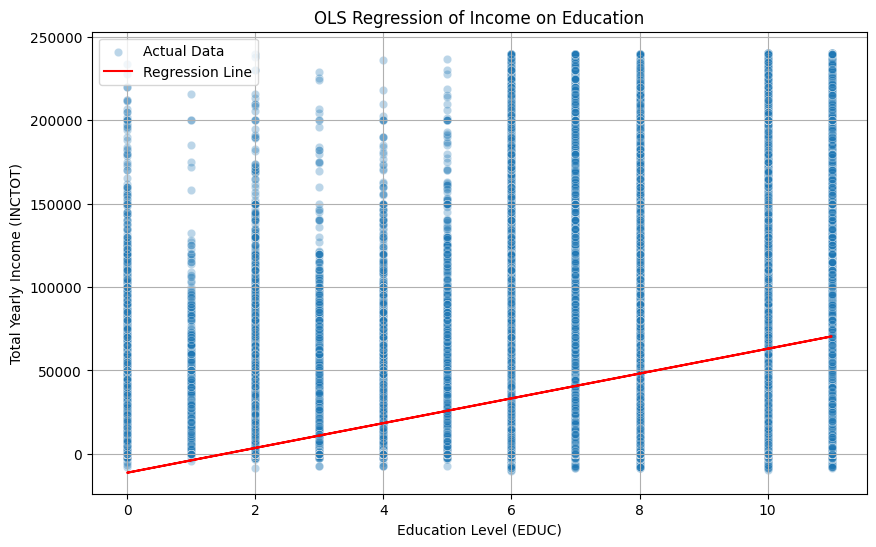

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='EDUC', y='INCTOT', alpha=0.3, label='Actual Data')
plt.plot(data['EDUC'], model.fittedvalues, color='red', label='Regression Line')
plt.title('OLS Regression of Income on Education')
plt.xlabel('Education Level (EDUC)')
plt.ylabel('Total Yearly Income (INCTOT)')
plt.legend(loc='upper left')
plt.grid(True)
plt.show()

## Summary:

### Q&A
*   **Can the null hypothesis be rejected?**
    Yes, the null hypothesis that "there is no statistically significant relationship between an individual's education level (EDUC) and their total yearly income (INCTOT)" can be rejected. This is indicated by the p-value for the `EDUC` coefficient being less than 0.001, suggesting a statistically significant relationship.
*   **What is the observed relationship between education and income?**
    There is a statistically significant positive linear relationship between education level (`EDUC`) and total yearly income (`INCTOT`). For each additional unit of education, the total yearly income is estimated to increase by approximately \$7,431.29.

### Data Analysis Key Findings
*   The null hypothesis, stating no statistically significant relationship between education level and total yearly income, was established.
*   An OLS linear regression model (`INCTOT ~ EDUC`) was successfully fitted to the data.
*   The model yielded an R-squared value of 0.174, meaning that approximately 17.4% of the variance in total yearly income (`INCTOT`) can be explained by education level (`EDUC`).
*   Both the intercept and the `EDUC` coefficient were highly statistically significant (p-values < 0.001).
*   The coefficient for `EDUC` was approximately 7431.29, indicating that on average, a one-unit increase in education level is associated with an increase of \$7,431.29 in total yearly income.
*   A scatter plot visualizing the relationship between `EDUC` and `INCTOT` with the overlaid regression line confirmed the positive linear trend.

### Insights or Next Steps
*   While education is a significant predictor of income, explaining about 17.4% of the variance, a substantial portion of income variation remains unexplained. Future analyses could explore additional socioeconomic factors (e.g., age, occupation, gender, geographic location) to build a more comprehensive predictive model.
*   Further investigation could involve examining the residuals of the model to check for heteroscedasticity or other violations of OLS assumptions, which might suggest the need for a different model or transformations.
